In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [2]:
act_train = pd.read_csv('act_train.csv')
act_test = pd.read_csv('act_test.csv')
people = pd.read_csv('people.csv')

In [3]:
sub_id = act_test['activity_id']

In [4]:
act_train.columns

Index(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome'],
      dtype='object')

In [5]:
people.columns

Index(['people_id', 'char_1', 'group_1', 'char_2', 'date', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37', 'char_38'],
      dtype='object')

In [6]:
train = pd.merge(act_train[['people_id','activity_id','date','activity_category','outcome']],people,how = 'left',on ='people_id',left_index = True)
test = pd.merge(act_test[['people_id','activity_id','date','activity_category']],people,how = 'left',on = 'people_id',left_index=True)

In [7]:
train.columns

Index(['people_id', 'activity_id', 'date_x', 'activity_category', 'outcome',
       'char_1', 'group_1', 'char_2', 'date_y', 'char_3', 'char_4', 'char_5',
       'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11', 'char_12',
       'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18',
       'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24',
       'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30',
       'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36',
       'char_37', 'char_38'],
      dtype='object')

In [8]:
def getdate(df):
    df['date_x'] = pd.to_datetime(df['date_x'])
    df['date_y'] = pd.to_datetime(df['date_y'])
    df['weekday_x'] = df['date_x'].apply(lambda x: x.isoweekday())
    df['weekday_y'] = df['date_y'].apply(lambda x: x.isoweekday())
    df.drop(['date_x','date_y'],axis = 1,inplace = True)
    return df
getdate(train)
getdate(test)
train.head()

,people_id,activity_id,activity_category,outcome,char_1,group_1,char_2,char_3,char_4,char_5,...,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,weekday_x,weekday_y
0,ppl_100,act2_1734928,type 4,0,type 2,group 17304,type 2,type 5,type 5,type 5,...,True,False,False,True,True,True,False,36,6,2
0,ppl_100,act2_2434093,type 2,0,type 2,group 17304,type 2,type 5,type 5,type 5,...,True,False,False,True,True,True,False,36,2,2
0,ppl_100,act2_3404049,type 2,0,type 2,group 17304,type 2,type 5,type 5,type 5,...,True,False,False,True,True,True,False,36,2,2
0,ppl_100,act2_3651215,type 2,0,type 2,group 17304,type 2,type 5,type 5,type 5,...,True,False,False,True,True,True,False,36,5,2
0,ppl_100,act2_4109017,type 2,0,type 2,group 17304,type 2,type 5,type 5,type 5,...,True,False,False,True,True,True,False,36,6,2


In [10]:
len(test.columns)

44

In [9]:
col_dash = ['people_id','activity_id']
col_space = list(train.columns[4:14])
col_space.append('activity_category')
col_bool = train.columns[14:42]
print(col_space)

['char_1', 'group_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'activity_category']


In [10]:
def cleanup(df):
    for col in col_dash:
        df[col] = df[col].apply(lambda x:x.split('_')[1])
        df[col] = pd.to_numeric(df[col]).astype(int)
    for col in col_space:
        df[col] = df[col].apply(lambda x:x.split(' ')[1])
        df[col] = df[col].fillna(-999)
        df[col] = pd.to_numeric(df[col]).astype(int)
    for col in col_bool:
        df[col] = pd.to_numeric(df[col]).astype(int)    

In [11]:
cleanup(train)
train.to_csv('numerical_train.csv', index = False)
train.head()

,people_id,activity_id,activity_category,outcome,char_1,group_1,char_2,char_3,char_4,char_5,...,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,weekday_x,weekday_y
0,100,1734928,4,0,2,17304,2,5,5,5,...,1,0,0,1,1,1,0,36,6,2
0,100,2434093,2,0,2,17304,2,5,5,5,...,1,0,0,1,1,1,0,36,2,2
0,100,3404049,2,0,2,17304,2,5,5,5,...,1,0,0,1,1,1,0,36,2,2
0,100,3651215,2,0,2,17304,2,5,5,5,...,1,0,0,1,1,1,0,36,5,2
0,100,4109017,2,0,2,17304,2,5,5,5,...,1,0,0,1,1,1,0,36,6,2


In [13]:
cleanup(test)

AttributeError: 'int' object has no attribute 'split'

In [14]:
test.to_csv('numerical_test.csv',index = False)
test.head()

,people_id,activity_id,activity_category,char_1,group_1,char_2,char_3,char_4,char_5,char_6,...,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,weekday_x,weekday_y
3,100004,249281,1,2,22593,3,40,25,9,4,...,1,1,1,1,1,1,1,76,3,3
3,100004,230855,5,2,22593,3,40,25,9,4,...,1,1,1,1,1,1,1,76,3,3
5,10001,240724,1,2,25417,3,6,6,4,1,...,1,1,1,1,1,1,1,90,5,5
5,10001,83552,1,2,25417,3,6,6,4,1,...,1,1,1,1,1,1,1,90,7,5
5,10001,1043301,5,2,25417,3,6,6,4,1,...,1,1,1,1,1,1,1,90,6,5


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

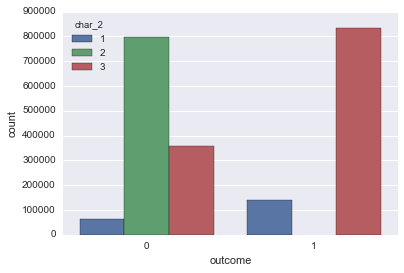

In [16]:
sns.countplot(train.outcome,hue = train.char_2)

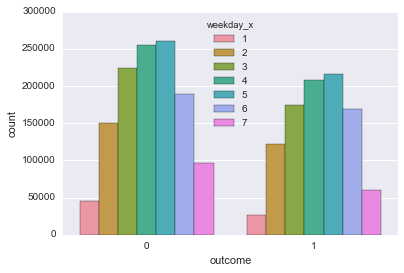

In [17]:
sns.countplot(train.outcome,hue = train.weekday_x)

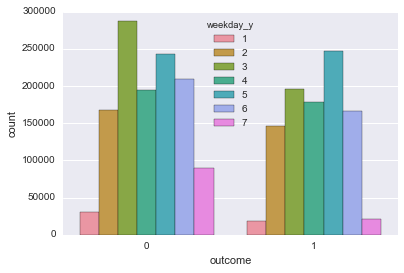

In [18]:
sns.countplot(train.outcome,hue = train.weekday_y)

In [19]:
train_col = list(train.columns)
train_col.remove('outcome')
train_col.remove('people_id')
train_col

['activity_id',
 'activity_category',
 'char_1',
 'group_1',
 'char_2',
 'char_3',
 'char_4',
 'char_5',
 'char_6',
 'char_7',
 'char_8',
 'char_9',
 'char_10',
 'char_11',
 'char_12',
 'char_13',
 'char_14',
 'char_15',
 'char_16',
 'char_17',
 'char_18',
 'char_19',
 'char_20',
 'char_21',
 'char_22',
 'char_23',
 'char_24',
 'char_25',
 'char_26',
 'char_27',
 'char_28',
 'char_29',
 'char_30',
 'char_31',
 'char_32',
 'char_33',
 'char_34',
 'char_35',
 'char_36',
 'char_37',
 'char_38',
 'weekday_x',
 'weekday_y']

In [21]:
from sklearn.ensemble import RandomForestClassifier
labels = train.columns[1:]
forest = RandomForestClassifier(n_estimators = 1000,random_state= 0,n_jobs = -1)
forest.fit(train[train_col],train['outcome'])
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train[train_col].shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, labels[f], importance[indices[f]]))

NameError: name 'labels' is not defined

In [22]:
labels = train_col
for f in range(train[train_col].shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, labels[f], importances[f]))

 1) activity_id                    0.044889
 2) activity_category              0.016778
 3) char_1                         0.014032
 4) group_1                        0.177678
 5) char_2                         0.108671
 6) char_3                         0.023993
 7) char_4                         0.023709
 8) char_5                         0.020275
 9) char_6                         0.030234
10) char_7                         0.051219
11) char_8                         0.027490
12) char_9                         0.021185
13) char_10                        0.004281
14) char_11                        0.003348
15) char_12                        0.003288
16) char_13                        0.014766
17) char_14                        0.004072
18) char_15                        0.003456
19) char_16                        0.004742
20) char_17                        0.005976
21) char_18                        0.003434
22) char_19                        0.004276
23) char_20                     

In [23]:
importance =pd.DataFrame()
importance['column'] = labels
importance['importance'] = importances
importance
important_feature = importance[importance['importance']>=0.02]

In [24]:
selected =important_feature['column'].tolist()

In [25]:
selected.append('outcome')

In [26]:
selected

['activity_id',
 'group_1',
 'char_2',
 'char_3',
 'char_4',
 'char_5',
 'char_6',
 'char_7',
 'char_8',
 'char_9',
 'char_38',
 'weekday_y',
 'outcome']

In [27]:
test['outcome'] = 0
selected_train = train[selected]
selected_test = test[selected]

In [28]:
def LeaveOneOut(data1, data2, columnName, useLOO=False):
    grpOutcomes = data1.groupby(columnName).mean().reset_index()
    outcomes = data2['outcome'].values
    x = pd.merge(data2[[columnName, 'outcome']], grpOutcomes,
                 suffixes=('x_', ''),
                 how='left',
                 on=columnName,
                 left_index=True)['outcome']
    if(useLOO):
        x = ((x*x.shape[0])-outcomes)/(x.shape[0]-1)
    return x.fillna(x.mean())


In [29]:
selected_trn = pd.DataFrame()
for col in selected_train.columns:
    if (col !='outcome' and col !='people_id'):
        selected_trn[col] = LeaveOneOut(selected_train,selected_train,col,True).values
selected_trn.head()

,activity_id,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_38,weekday_y
0,0.0,0.0,0.0,0.55286,0.553673,0.493344,0.47495,0.616104,0.683161,0.676301,0.0,0.467742
1,0.0,0.0,0.0,0.55286,0.553673,0.493344,0.47495,0.616104,0.683161,0.676301,0.0,0.467742
2,0.0,0.0,0.0,0.55286,0.553673,0.493344,0.47495,0.616104,0.683161,0.676301,0.0,0.467742
3,0.0,0.0,0.0,0.55286,0.553673,0.493344,0.47495,0.616104,0.683161,0.676301,0.0,0.467742
4,0.0,0.0,0.0,0.55286,0.553673,0.493344,0.47495,0.616104,0.683161,0.676301,0.0,0.467742


In [30]:
selected_tst = pd.DataFrame()
for col in selected_train.columns:
    if (col !='outcome' and col !='people_id'):
        selected_tst[col] = LeaveOneOut(selected_train,selected_test,col,False).values
selected_tst.head()

,activity_id,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_38,weekday_y
0,1.000000,0.0,0.698855,0.359654,0.359654,0.359654,0.281776,0.252974,0.683161,0.676301,0.727121,0.404882
1,0.445333,0.0,0.698855,0.359654,0.359654,0.359654,0.281776,0.252974,0.683161,0.676301,0.727121,0.404882
2,0.000000,1.0,0.698855,0.487684,0.470620,0.520485,0.607917,0.554140,0.683161,0.676301,0.796851,0.504729
3,0.000000,1.0,0.698855,0.487684,0.470620,0.520485,0.607917,0.554140,0.683161,0.676301,0.796851,0.504729
4,0.445333,1.0,0.698855,0.487684,0.470620,0.520485,0.607917,0.554140,0.683161,0.676301,0.796851,0.504729


In [137]:
forest2 = RandomForestClassifier(n_estimators = 1000,random_state= 0,n_jobs = -1)
forest2.fit(selected_trn,train['outcome'])
importances2 = forest2.feature_importances_

In [138]:
importances2

array([ 0.3776547 ,  0.28306853,  0.14571823,  0.00166817,  0.0061136 ,
        0.01847674,  0.01160705,  0.00041342,  0.02680791,  0.02186585,
        0.10082818,  0.00577761])

In [31]:
from sklearn.cross_validation import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(train,target,test_size = 0.2,random_state = 1)
from sklearn.metrics import accuracy_score,roc_auc_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [140]:
xgb1 = XGBClassifier()
xgb1 = xgb1.fit(selected_trn,train['outcome'],eval_metric = 'auc')

In [142]:
xgb1_test = xgb1.predict_proba(selected_tst)

In [144]:
xgb1_selected_test = pd.DataFrame({'activity_id':sub_id,'outcome':xgb1_test[:,1]})
xgb1_selected_test.to_csv('xgb1_selected_test.csv',index = False)

In [35]:
dtrain = xgb.DMatrix(selected_trn,train.outcome)
dtest = xgb.DMatrix(selected_tst)
param = {'max_depth':2, 'eta':1,'silent':1,'objective':'binary:logistic','eval_metric':'auc'}
num_round = 200
bst1 = xgb.train(param,dtrain,num_round)
preds = bst1.predict(dtest)

In [39]:
bst1_sub = pd.DataFrame({'activity_id':sub_id,'outcome':(1 - preds)})
bst1_sub.to_csv('bst1_sub.csv', index = False)

In [40]:
param2 = {'max_depth':9,'min_child_weight':3, 'eta':0.01,'gamma':0.3,'subsample':0.8,'colsample_bytree':0.9,'alpha':1e-05,'silent':1,'objective':'binary:logistic','eval_metric':'auc'}
num_round = 2000
bst2 = xgb.train(param2,dtrain,num_round)
pred2 = bst2.predict(dtest)

In [41]:
bst2_sub = pd.DataFrame({'activity_id':sub_id,'outcome':(1 - pred2)})
bst2_sub.to_csv('bst2_sub.csv', index = False)